# Dashboard

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# cria um novo recurso usando as duas primeiras letras do item_identifier

train['Item_Category'] = train['Item_Identifier'].apply(lambda x: x[:2])
train['Item_Category'] = train['Item_Category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
train['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Category, dtype: int64

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [4]:
train['Item_Visibility'].min()

0.0

In [5]:
print('Total de 0s antes da substituição: ', sum(train['Item_Visibility'] == 0))

# Substituindo os 0s pela média
train.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value=train['Item_Visibility'].mean(),
                                            inplace=True)

# Total de 0s após a substituição
print('Total de 0s após a substituição: ', sum(train['Item_Visibility'] == 0))

Total de 0s antes da substituição:  526
Total de 0s após a substituição:  0


<AxesSubplot:xlabel='Item_Category', ylabel='count'>

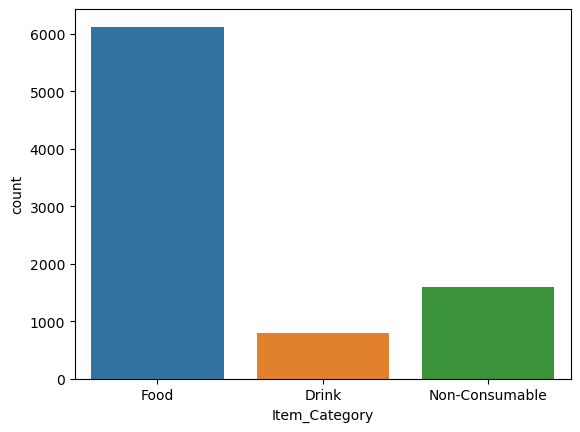

In [6]:
sns.countplot(train['Item_Category'])

In [7]:
# Data binding

train.loc[train['Item_Identifier'] == 'Item_Weight', 'Item_Identifier'] = 'Others'
train.loc[train['Item_Identifier'] == 'Item_Fat_Content', 'Item_Identifier'] = 'Others'
train.loc[train['Item_Identifier'] == 'Item_Visibility', 'Item_Identifier'] = 'Others'
train.loc[train['Item_Identifier'] == 'Item_Type', 'Item_Identifier'] = 'Others'

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


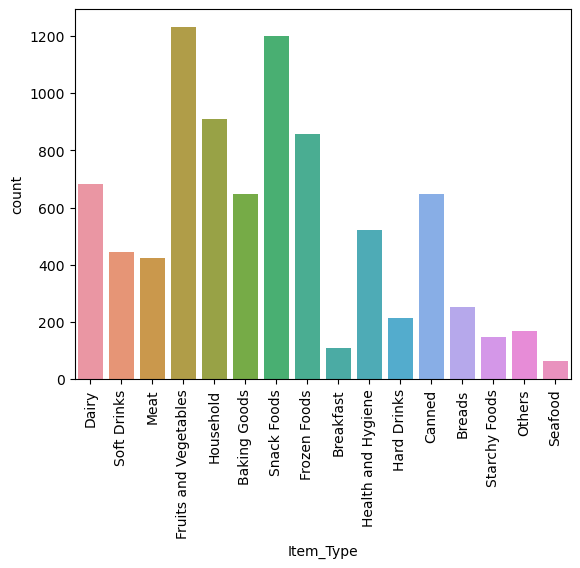

In [9]:
labels = list(train['Item_Type'].unique())
countbar = sns.countplot(train['Item_Type'])
countbar.set_xticklabels(labels=labels, rotation=90);

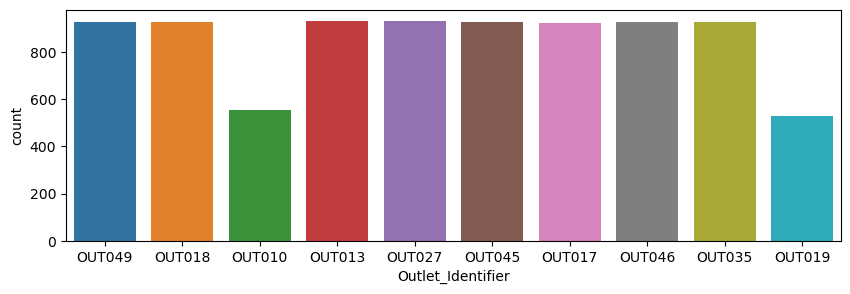

In [10]:
fig, axes = plt.subplots(figsize=(10, 3))

sns.countplot(train['Outlet_Identifier']);

In [11]:
# Dez itens mais vendidos

pd.DataFrame(data=train, columns=(['Item_Identifier', 'Item_Outlet_Sales'])).head(10).groupby(by='Item_Identifier').sum().sort_values(by='Item_Outlet_Sales', ascending=False).round(2)

,Item_Outlet_Sales
Item_Identifier,
FDU28,4710.54
FDP10,4022.76
FDA15,3735.14
FDN15,2097.27
FDH17,1076.60
NCD19,994.71
FDX07,732.38
FDP36,556.61
DRC01,443.42


In [12]:
train['Outlet_Size'].isna().sum()

2410

In [13]:
Outlet_Type_Size = train.pivot_table(values='Outlet_Size',
                                                      columns='Outlet_Type',
                                                      aggfunc=lambda x: x.mode())
Outlet_Type_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
missing_values = train['Outlet_Size'].isnull()
train.loc[missing_values, 'Outlet_Size'] = train.loc[missing_values, 'Outlet_Type'].apply(lambda x: Outlet_Type_Size[x].Outlet_Size)
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Category                   0
dtype: int64

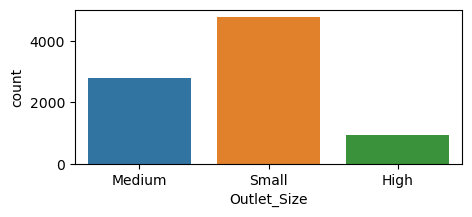

In [15]:
fig, axes = plt.subplots(figsize=(5, 2))

sns.countplot(train['Outlet_Size']);

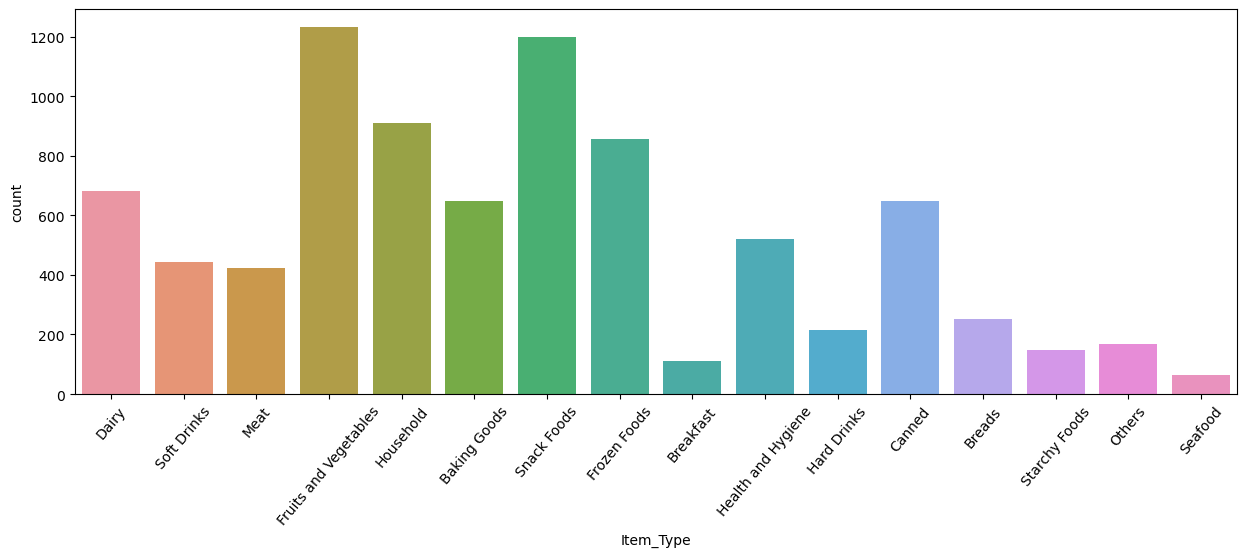

In [16]:
fig, axes = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=50)
sns.countplot(train['Item_Type']);

In [17]:
# Receita obtida com cada categoria

pd.DataFrame(data=train, columns=(['Item_Type', 'Item_Outlet_Sales'])).groupby(by='Item_Type').sum().sort_values(by='Item_Outlet_Sales', ascending=False).round(2)

,Item_Outlet_Sales
Item_Type,
Fruits and Vegetables,2820059.82
Snack Foods,2732786.09
Household,2055493.71
Frozen Foods,1825734.79
Dairy,1522594.05
Canned,1444151.49
Baking Goods,1265525.34
Health and Hygiene,1045200.14
Meat,917565.61


In [18]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [19]:
# Ha quantos anos ocorreu a venda, contando a partir de 2009

train['Outlet_Years'] = 2009 - train['Outlet_Establishment_Year']
train['Outlet_Years']

0       10
1        0
2       10
3       11
4       22
        ..
8518    22
8519     7
8520     5
8521     0
8522    12
Name: Outlet_Years, Length: 8523, dtype: int64

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,11
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,22


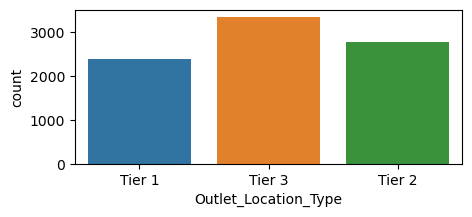

In [21]:
fig, axes = plt.subplots(figsize=(5, 2))

sns.countplot(train['Outlet_Location_Type']);

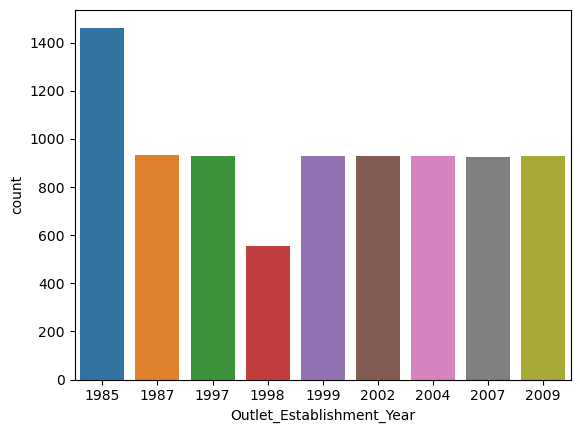

In [22]:
sns.countplot(train['Outlet_Establishment_Year']);

In [23]:
# Anos com maiores receitas

pd.DataFrame(data=train, columns=(['Outlet_Establishment_Year', 'Item_Outlet_Sales'])).groupby(by='Outlet_Establishment_Year').sum().sort_values(by='Item_Outlet_Sales', ascending=False).round(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3633620.14
2004,2268122.94
1999,2183969.81
2007,2167465.29
1987,2142663.58
1997,2118395.17
2002,2036725.48
2009,1851822.83
1998,188340.17


In [24]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
train['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

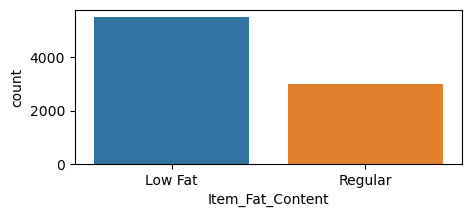

In [26]:
fig, axes = plt.subplots(figsize=(5, 2))

sns.countplot(train['Item_Fat_Content']);

In [27]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Category                   0
Outlet_Years                    0
dtype: int64

In [28]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Category                0
Outlet_Years                 0
dtype: int64

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Category              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

In [30]:
encoder = LabelEncoder()

encodecol = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']

for col in encodecol:
    train[col] = encoder.fit_transform(train[col])

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,156,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,8,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,0
2,662,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,1121,19.20,Regular,0.066132,6,182.0950,0,1998,Small,Tier 3,Grocery Store,732.3800,Food,11
4,1297,8.93,Low Fat,0.066132,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,22


In [32]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'])

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   int32  
 1   Item_Weight                    8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_Type                      8523 non-null   int32  
 4   Item_MRP                       8523 non-null   float64
 5   Outlet_Identifier              8523 non-null   int32  
 6   Outlet_Establishment_Year      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Outlet_Years                   8523 non-null   int64  
 9   Item_Fat_Content_Low Fat       8523 non-null   uint8  
 10  Item_Fat_Content_Regular       8523 non-null   uint8  
 11  Outlet_Size_High               8523 non-null   uint8  
 12  Outlet_Size_Medium             8523 non-null   u

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,10,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,0,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,10,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.066132,6,182.0950,0,1998,732.3800,11,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.066132,9,53.8614,1,1987,994.7052,22,1,...,0,0,1,0,1,0,0,0,0,1


In [35]:
corr_matrix = train.corr(method = 'spearman')
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.562986
Outlet_Type_Supermarket Type3    0.268777
Outlet_Type_Supermarket Type1    0.208240
Outlet_Size_Medium               0.208096
Outlet_Identifier                0.204211
Outlet_Location_Type_Tier 2      0.108938
Outlet_Size_High                 0.047451
Outlet_Establishment_Year        0.042947
Item_Category_Food               0.026047
Item_Type                        0.019747
Item_Fat_Content_Regular         0.018787
Item_Weight                      0.013125
Item_Identifier                  0.007701
Outlet_Location_Type_Tier 3      0.005067
Item_Category_Non-Consumable    -0.001509
Outlet_Type_Supermarket Type2   -0.016072
Item_Fat_Content_Low Fat        -0.018787
Item_Category_Drink             -0.038162
Outlet_Years                    -0.042947
Outlet_Location_Type_Tier 1     -0.119286
Item_Visibility                 -0.120399
Outlet_Size_Small               -0.226772
Outlet_Type_Grocery Store       -0

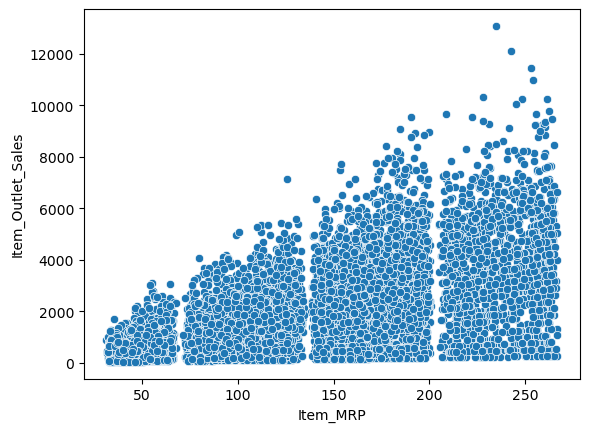

In [36]:
sns.scatterplot(data=train, x='Item_MRP', y='Item_Outlet_Sales');

In [37]:
train['Item_Outlet_Sales'].var(), train['Item_Outlet_Sales'].std()

(2912140.938499716, 1706.499615733832)

In [38]:
amplitude = train['Item_Outlet_Sales'].max() - train['Item_Outlet_Sales'].min()
amplitude

13053.674799999999

In [39]:
from scipy import stats

# interquartile range

iqr = stats.iqr(train['Item_Outlet_Sales'], interpolation = 'midpoint')
iqr

2267.049

In [40]:
# Quartile Deviation / median interquartile range

qd = iqr / 2
qd

1133.5245

In [41]:
from sklearn.metrics import mean_absolute_percentage_error
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import pmdarima as pm
from sklearn.model_selection import train_test_split

In [42]:
X = train[['Item_MRP', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Supermarket Type1', 'Outlet_Size_Medium', 'Outlet_Identifier', 'Outlet_Location_Type_Tier 2']]
y = train['Item_Outlet_Sales']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 6), (1705, 6), (6818,), (1705,))

In [45]:
X.head()

,Item_MRP,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type1,Outlet_Size_Medium,Outlet_Identifier,Outlet_Location_Type_Tier 2
0,249.8092,0,1,1,9,0
1,48.2692,0,0,1,3,0
2,141.6180,0,1,1,9,0
3,182.0950,0,0,0,0,0
4,53.8614,0,1,0,1,0


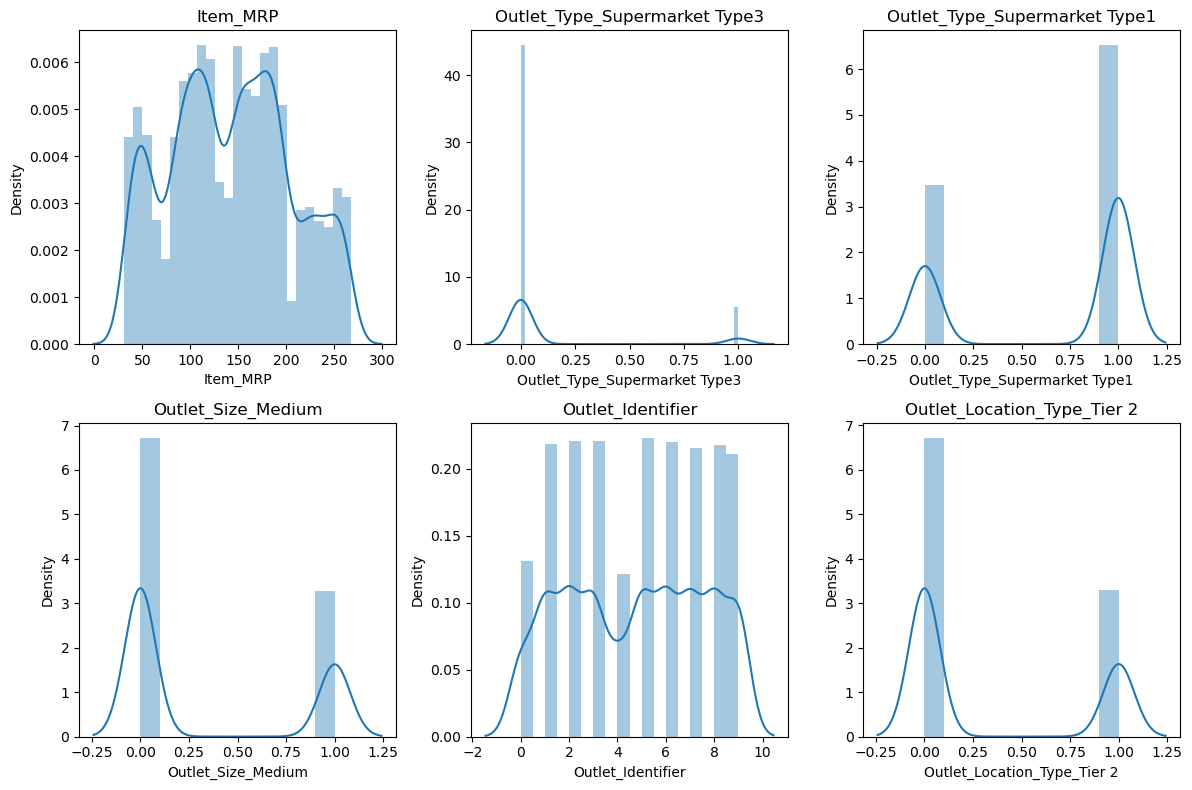

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Criando os distplots
sns.distplot(X_train['Item_MRP'], ax=axes[0, 0])
axes[0, 0].set_title('Item_MRP')

sns.distplot(X_train['Outlet_Type_Supermarket Type3'], ax=axes[0, 1])
axes[0, 1].set_title('Outlet_Type_Supermarket Type3')

sns.distplot(X_train['Outlet_Type_Supermarket Type1'], ax=axes[0, 2])
axes[0, 2].set_title('Outlet_Type_Supermarket Type1')

sns.distplot(X_train['Outlet_Size_Medium'], ax=axes[1, 0])
axes[1, 0].set_title('Outlet_Size_Medium')

sns.distplot(X_train['Outlet_Identifier'], ax=axes[1, 1])
axes[1, 1].set_title('Outlet_Identifier')

sns.distplot(X_train['Outlet_Location_Type_Tier 2'], ax=axes[1, 2])
axes[1, 2].set_title('Outlet_Location_Type_Tier 2')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [48]:
X_train_transformed.shape, X_test_transformed.shape

((6818, 6), (1705, 6))

In [49]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X.columns)

In [50]:
# Com nível de significância de 0.0009 aceitamos a hipótese alternativa
# que Item_MRP não é uma distribuição Gaussiana

import statsmodels
from statsmodels.stats.diagnostic import lilliefors

statsmodels.stats.diagnostic.lilliefors(X_train_transformed['Item_MRP'], dist='norm')

(0.04462450827189074, 0.0009999999999998899)

In [51]:
X_train_transformed

,Item_MRP,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type1,Outlet_Size_Medium,Outlet_Identifier,Outlet_Location_Type_Tier 2
0,0.594464,0.0,1.0,1.0,1.000000,0.0
1,0.591057,0.0,1.0,0.0,0.777778,1.0
2,0.341387,0.0,1.0,0.0,0.888889,0.0
3,0.043819,0.0,1.0,0.0,0.777778,1.0
4,0.527478,0.0,1.0,0.0,0.888889,0.0
...,...,...,...,...,...,...
6813,0.457956,0.0,0.0,0.0,0.000000,0.0
6814,0.188359,0.0,1.0,0.0,0.222222,1.0
6815,0.874662,0.0,1.0,0.0,0.777778,1.0
6816,0.367815,0.0,1.0,0.0,0.222222,1.0


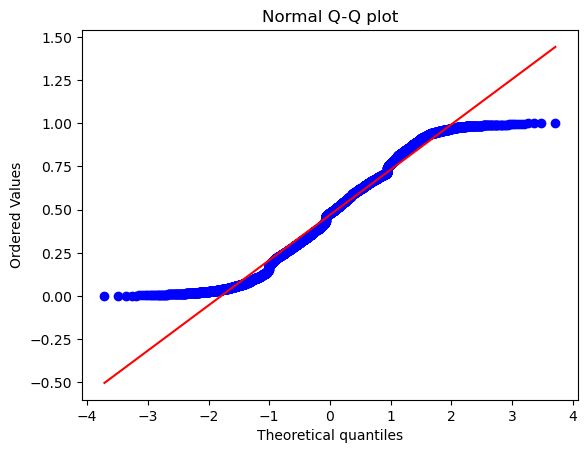

In [52]:
# Mais um teste que demonstra através dos quartis
# que a distribuição do Item_MRP não é Gaussiana

stats.probplot(X_train_transformed['Item_MRP'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

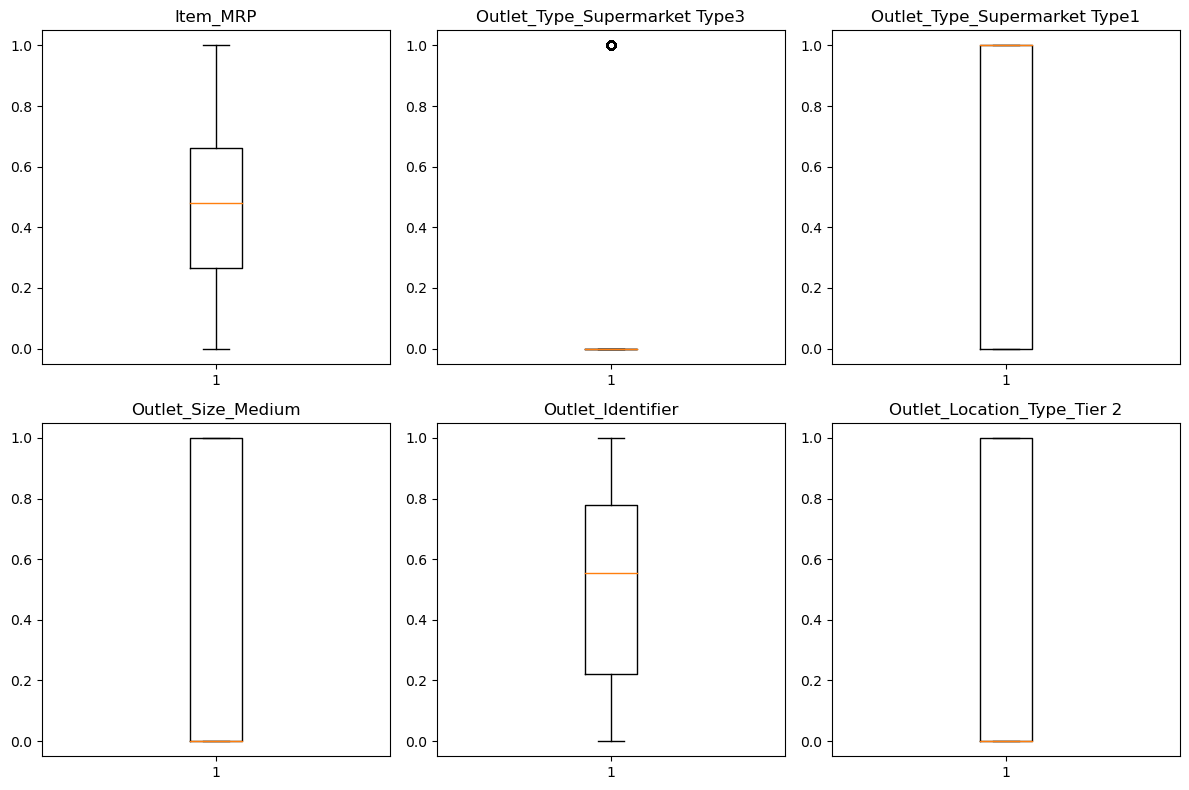

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes[0, 0].boxplot(X_train_transformed['Item_MRP'])
axes[0, 0].set_title('Item_MRP')

axes[0, 1].boxplot(X_train_transformed['Outlet_Type_Supermarket Type3'])
axes[0, 1].set_title('Outlet_Type_Supermarket Type3')

axes[0, 2].boxplot(X_train_transformed['Outlet_Type_Supermarket Type1'])
axes[0, 2].set_title('Outlet_Type_Supermarket Type1')

axes[1, 0].boxplot(X_train_transformed['Outlet_Size_Medium'])
axes[1, 0].set_title('Outlet_Size_Medium')

axes[1, 1].boxplot(X_train_transformed['Outlet_Identifier'])
axes[1, 1].set_title('Outlet_Identifier')

axes[1, 2].boxplot(X_train_transformed['Outlet_Location_Type_Tier 2'])
axes[1, 2].set_title('Outlet_Location_Type_Tier 2')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [54]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

statsmodels.stats.diagnostic.lilliefors(X_train_transformed['Item_MRP'], dist='norm')

(0.04462450827189074, 0.0009999999999998899)

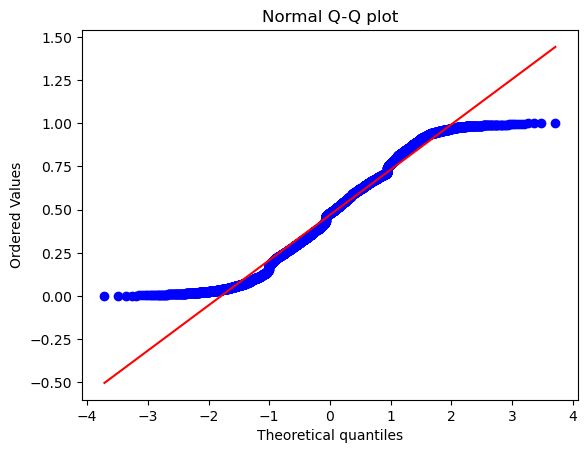

In [55]:
stats.probplot(X_train_transformed['Item_MRP'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Linear Regression

In [56]:
reg = LinearRegression().fit(X_train_transformed, y_train)
lin_R2 = reg.score(X_test_transformed, y_test)

In [57]:
lin_R2

0.5549173573615445

In [58]:
pipeline = make_pipeline(MinMaxScaler(), reg)

In [59]:
pipeline.fit(X_train_transformed, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [60]:
y_hat = pipeline.predict(X_test_transformed)

In [61]:
residuals = y_test - y_hat

In [62]:
residuals.mean()

-22.73378912935713

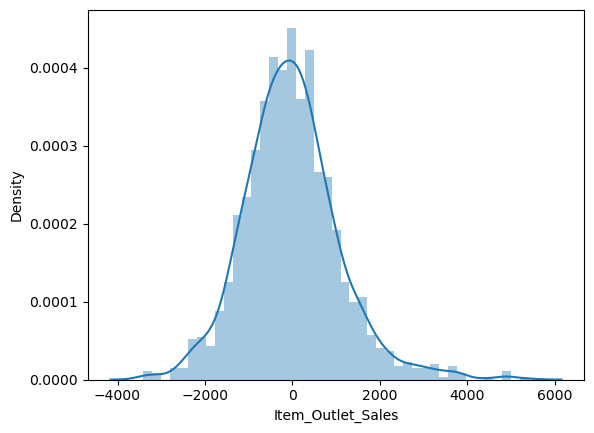

In [63]:
sns.distplot(residuals);

In [64]:
statsmodels.stats.diagnostic.lilliefors(residuals, dist='norm')

(0.05322936664015743, 0.0009999999999998899)

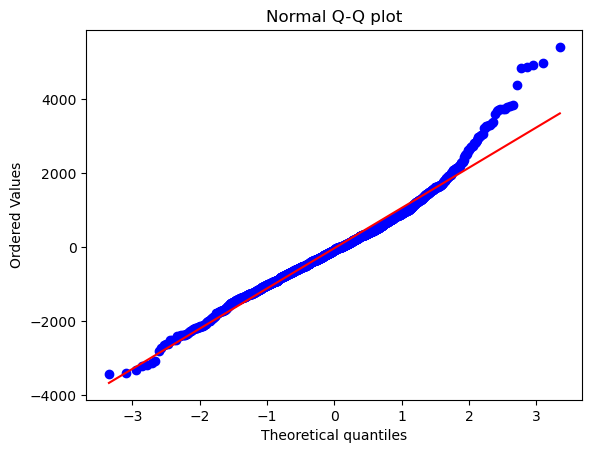

In [65]:
stats.probplot(residuals, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [66]:
# Não temos evidências suficientes para dizer que a heterocedasticidade é um problema no modelo de regressão.
# p-value está muito maior que 0.05

from statsmodels.stats.diagnostic import het_goldfeldquandt

statsmodels.stats.diagnostic.het_goldfeldquandt(y_test, X_test_transformed, idx=None, split=None, drop=None, alternative='increasing', store=False)

(0.9586614999047645, 0.7303685594192979, 'increasing')

In [67]:
# Teste de durbin_watson testa a correlação entre os dados do resíduo.
# resultado = 2 indica ausência de correlação

from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals, axis=0)

2.0024575631600414

In [68]:
from sklearn.metrics import mean_absolute_percentage_error

linreg_mape = mean_absolute_percentage_error(y_test, y_hat)

# Random Forest

In [69]:
forest = RandomForestRegressor(n_estimators=100, criterion='absolute_error')
forest.fit(X_train_transformed, y_train)

RandomForestRegressor(criterion='absolute_error')

In [70]:
#Pontuação do R²

forest.score(X_test_transformed, y_test)

0.45663055809696196

In [71]:
cv_results = cross_val_score(forest, X_test_transformed, y_test).mean()

cv_results

0.48166907502063105

In [72]:
forest_pred = forest.predict(X_test_transformed)

In [73]:
forest_pred

array([ 686.835951,  660.27386 ,  719.190502, ...,  731.68091 ,
        507.699132, 1537.169079])

In [74]:
forest_mape = mean_absolute_percentage_error(y_test, forest_pred)

In [75]:
forest_mape

0.5954731956156655

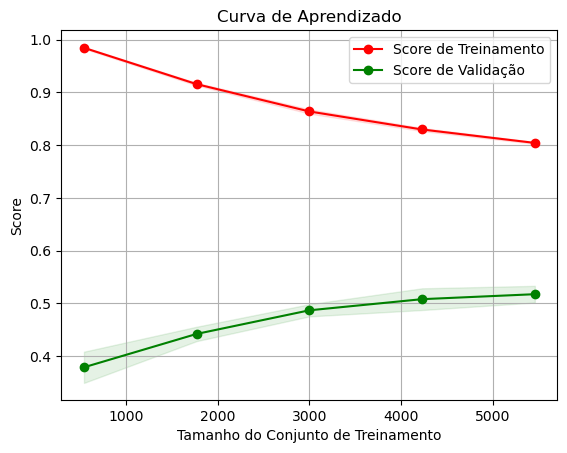

In [76]:
from sklearn.model_selection import learning_curve

X, y = X_train_transformed, y_train

# Definir o modelo de aprendizado de máquina
model = XGBRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

In [77]:
residuals_forest = y_test - forest_pred

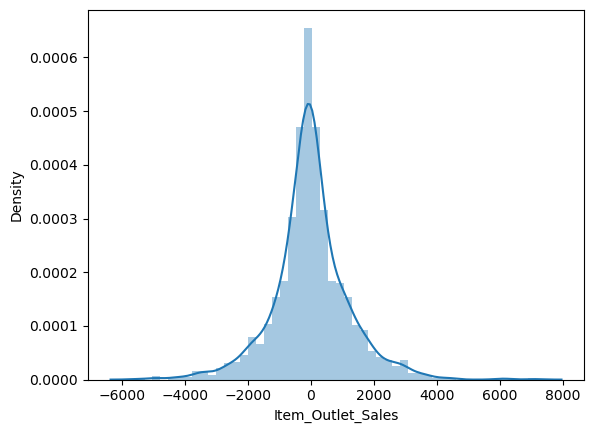

In [78]:
sns.distplot(residuals_forest);

In [79]:
residuals_forest.mean()

-7.635003901466313

# XGBoostRegressor

In [80]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [81]:
xgb_reg = XGBRegressor(max_depth=100, n_estimators=1000, learning_rate=0.1)

xgb_reg.fit(X_train_transformed, y_train,
            eval_metric='mape',
            #Avalia a perda em cada iteração
            eval_set=[(X_train_transformed, y_train), (X_test_transformed, y_test)],  
            #Para de iterar quando a perda de avaliação aumenta 30 vezes seguidas
            early_stopping_rounds=30
            )

[0]	validation_0-mape:0.87103	validation_1-mape:0.86787
[1]	validation_0-mape:0.76334	validation_1-mape:0.75771
[2]	validation_0-mape:0.67724	validation_1-mape:0.67138
[3]	validation_0-mape:0.60752	validation_1-mape:0.60152
[4]	validation_0-mape:0.55159	validation_1-mape:0.54983
[5]	validation_0-mape:0.50696	validation_1-mape:0.51677
[6]	validation_0-mape:0.47196	validation_1-mape:0.49528
[7]	validation_0-mape:0.44124	validation_1-mape:0.48108
[8]	validation_0-mape:0.41356	validation_1-mape:0.47270
[9]	validation_0-mape:0.39220	validation_1-mape:0.46684
[10]	validation_0-mape:0.37025	validation_1-mape:0.46586
[11]	validation_0-mape:0.34939	validation_1-mape:0.46604
[12]	validation_0-mape:0.32989	validation_1-mape:0.46844
[13]	validation_0-mape:0.31194	validation_1-mape:0.47219
[14]	validation_0-mape:0.29544	validation_1-mape:0.47621
[15]	validation_0-mape:0.28064	validation_1-mape:0.48157
[16]	validation_0-mape:0.26576	validation_1-mape:0.48751
[17]	validation_0-mape:0.25153	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [82]:
xgb_pred = xgb_reg.predict(X_test_transformed)

In [83]:
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)

In [84]:
xgb_mape

0.4658649285345917

In [85]:
xgb_pred

array([ 549.29926,  504.88104,  490.28674, ...,  495.86234,  482.7318 ,
       1036.8062 ], dtype=float32)

In [86]:
xgb_residuals = y_test - xgb_pred

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

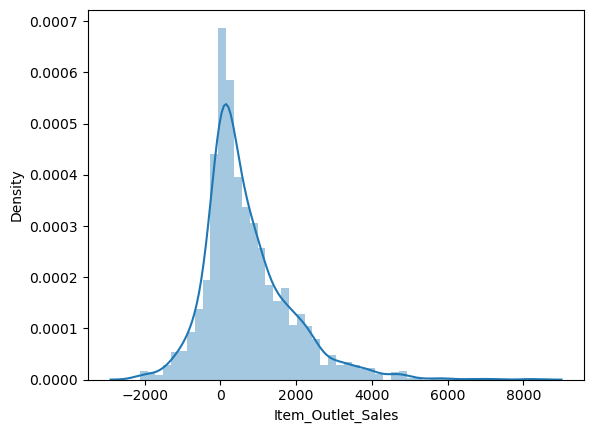

In [87]:
sns.distplot(xgb_residuals)

In [88]:
xgb_residuals.mean()

688.8825451244358

In [89]:
# Há Autocorrelação inferior nos resíduos 

from statsmodels.stats.stattools import durbin_watson

durbin_watson(xgb_residuals, axis=0)

1.4634162501738817

# SVM

In [90]:
from sklearn.svm import SVR
svr = SVR(epsilon=0.1, C=1, kernel='poly')

In [91]:
svr.fit(X_train_transformed, y_train)

SVR(C=1, kernel='poly')

In [92]:
svr.score(X_test_transformed, y_test)

0.5091802571723267

In [93]:
svr_predict = svr.predict(X_test_transformed)

In [94]:
svr_mape = mean_absolute_percentage_error(y_test, svr_predict)

In [95]:
svr_residuals = y_test - svr_predict

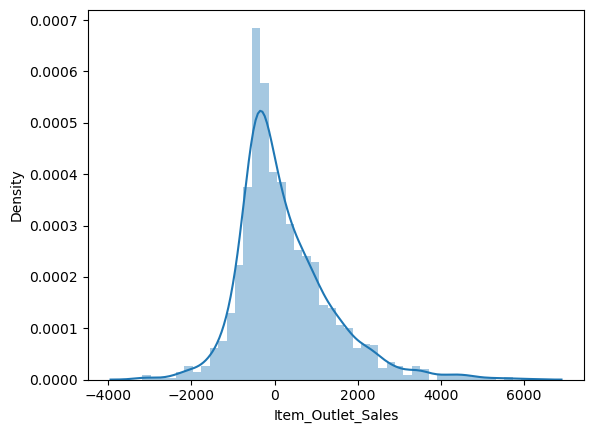

In [96]:
sns.distplot(svr_residuals);

In [97]:
svr_residuals.mean()

237.8044845442947

In [98]:
# Não há evidências de autocorrelação nos resíduos

from statsmodels.stats.stattools import durbin_watson

durbin_watson(svr_residuals, axis=0)

1.9235454923578341

In [99]:
# Distribuição não normal dos resíduos

from statsmodels.stats.diagnostic import lilliefors

statsmodels.stats.diagnostic.lilliefors(svr_residuals, dist='norm')

(0.10655035729621609, 0.0009999999999998899)

In [100]:
# Não temos evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema.
# p-value muito maior que 0.05


from statsmodels.stats.diagnostic import het_goldfeldquandt

statsmodels.stats.diagnostic.het_goldfeldquandt(y_test, X_test_transformed, idx=None, split=None, drop=None, alternative='increasing', store=False)

(0.9586614999047645, 0.7303685594192979, 'increasing')

# Deep Learning

In [101]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks

# Deep learning LSTM(Long Short Term Memory).
# batch_size=16 pega 16 amostras por teste.
# epochs=1000 quantidade de vezes que será treinado.
# Validation_split=0.3 separa 30% dos dados para o conjunto de validação.

deepLSTM = Sequential()
deepLSTM.add(LSTM(units=3, activation='relu', input_shape=(6,1)))
deepLSTM.add(layers.Dense(1, activation="linear"))

deepLSTM.compile(loss='mae', optimizer='adam')

es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

deepLSTM.fit(X_train_transformed, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_transformed, y_test))

Epoch 1/1000
427/427 [==============================] - 3s 3ms/step - loss: 1775.4226 - val_loss: 1011.8768
Epoch 2/1000
427/427 [==============================] - 1s 2ms/step - loss: 1027.0137 - val_loss: 939.1685
Epoch 3/1000
427/427 [==============================] - 1s 2ms/step - loss: 972.1678 - val_loss: 897.0482
Epoch 4/1000
427/427 [==============================] - 1s 2ms/step - loss: 939.2827 - val_loss: 868.4960
Epoch 5/1000
427/427 [==============================] - 1s 2ms/step - loss: 915.8300 - val_loss: 849.7202
Epoch 6/1000
427/427 [==============================] - 1s 2ms/step - loss: 900.8380 - val_loss: 835.0028
Epoch 7/1000
427/427 [==============================] - 1s 2ms/step - loss: 889.1312 - val_loss: 823.3565
Epoch 8/1000
427/427 [==============================] - 1s 3ms/step - loss: 880.1962 - val_loss: 815.9859
Epoch 9/1000
427/427 [==============================] - 1s 2ms/step - loss: 874.4091 - val_loss: 810.2103
Epoch 10/1000
427/427 [====================

427/427 [==============================] - 1s 2ms/step - loss: 770.7835 - val_loss: 715.6763
Epoch 78/1000
427/427 [==============================] - 1s 2ms/step - loss: 770.3901 - val_loss: 717.4556
Epoch 79/1000
427/427 [==============================] - 1s 3ms/step - loss: 770.7961 - val_loss: 716.0672
Epoch 80/1000
427/427 [==============================] - 1s 3ms/step - loss: 772.6979 - val_loss: 715.2696
Epoch 81/1000
427/427 [==============================] - 1s 2ms/step - loss: 769.2432 - val_loss: 715.8589
Epoch 82/1000
427/427 [==============================] - 1s 2ms/step - loss: 769.6044 - val_loss: 715.0511
Epoch 83/1000
427/427 [==============================] - 1s 2ms/step - loss: 770.4569 - val_loss: 715.3044
Epoch 84/1000
427/427 [==============================] - 1s 2ms/step - loss: 776.4191 - val_loss: 715.3004
Epoch 85/1000
427/427 [==============================] - 1s 2ms/step - loss: 768.9297 - val_loss: 714.9713
Epoch 86/1000
427/427 [============================

427/427 [==============================] - 1s 3ms/step - loss: 761.4533 - val_loss: 708.7889
Epoch 154/1000
427/427 [==============================] - 1s 3ms/step - loss: 760.3378 - val_loss: 709.4402
Epoch 155/1000
427/427 [==============================] - 1s 3ms/step - loss: 760.8338 - val_loss: 709.3392
Epoch 156/1000
427/427 [==============================] - 1s 3ms/step - loss: 760.9451 - val_loss: 709.3259
Epoch 157/1000
427/427 [==============================] - 1s 3ms/step - loss: 760.6726 - val_loss: 710.4316
Epoch 158/1000
427/427 [==============================] - 1s 3ms/step - loss: 760.7413 - val_loss: 710.7505
Epoch 159/1000
427/427 [==============================] - 1s 3ms/step - loss: 761.1081 - val_loss: 708.3346
Epoch 160/1000
427/427 [==============================] - 1s 3ms/step - loss: 760.3129 - val_loss: 708.3028
Epoch 161/1000
427/427 [==============================] - 1s 3ms/step - loss: 761.0614 - val_loss: 709.9712
Epoch 162/1000
427/427 [===================

In [102]:
deepLSTMpred = deepLSTM.predict(X_test_transformed)

54/54 [==============================] - 0s 1ms/step


In [103]:
deep_LSTM_mape = mean_absolute_percentage_error(y_test, deepLSTMpred)

In [104]:
import eli5
from eli5 import show_prediction

eli5.show_weights(forest, feature_names = list(X_test_transformed))

Weight,Feature
0.7195 ± 0.0171,Item_MRP
0.1564 ± 0.0379,Outlet_Identifier
0.0494 ± 0.0077,Outlet_Type_Supermarket Type3
0.0334 ± 0.0315,Outlet_Size_Medium
0.0289 ± 0.0068,Outlet_Type_Supermarket Type1
0.0125 ± 0.0041,Outlet_Location_Type_Tier 2


In [105]:
eli5.show_prediction(forest, X_train_transformed['Item_MRP'][0:6], feature_names = list(X_train_transformed)[0:6], show_feature_values=True)

In [106]:
eli5.explain_weights(forest)

Weight,Feature
0.7195 ± 0.0171,x0
0.1564 ± 0.0379,x4
0.0494 ± 0.0077,x1
0.0334 ± 0.0315,x3
0.0289 ± 0.0068,x2
0.0125 ± 0.0041,x5


In [107]:
eli5.explain_prediction(forest, forest_pred[0:6])

Explanation(estimator="RandomForestRegressor(criterion='absolute_error')", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x1', weight=1822.7173830000008, std=None, value=660.2738599999998), FeatureWeight(feature='<BIAS>', weight=1804.3213290000006, std=None, value=1.0), FeatureWeight(feature='x4', weight=145.10445199999998, std=None, value=2563.216813999996)], neg=[FeatureWeight(feature='x0', weight=-858.2827800000007, std=None, value=686.8359509999996)], pos_remaining=0, neg_remaining=0), proba=None, score=2913.8603839999973, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [108]:
score = {'Model': ['Linear Regression', 'Deep Learning LSTM', 'Random Forest', 'XGBRegressor', 'SVR'],
         'Score Mape': [linreg_mape, deep_LSTM_mape, forest_mape, xgb_mape, svr_mape]}

In [109]:
df_score = pd.DataFrame(score)

In [110]:
df_score = round(df_score.sort_values('Score Mape'), 2)

In [111]:
df_score

,Model,Score Mape
3,XGBRegressor,0.47
1,Deep Learning LSTM,0.52
2,Random Forest,0.60
4,SVR,0.80
0,Linear Regression,0.99
